In [1]:
# !pip install ipykernel
# !pip install pydeck
# !pip install --upgrade streamlit

In [2]:
from nltk.util import pr
import nltk
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# import streamlit as st

In [3]:
nltk.download('stopwords')

data = pd.read_csv("labeled_data.csv")
print(data.head())


   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
data["labels"] = data["class"].map({0: "Hate Speech Detected", 1: "Offensive Language", 2: "No Hate and Offensive"})
print(data.head())

data = data[["tweet", "labels"]]
print(data.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet                 labels  
0  !!! RT @mayasolovely: As a woman you shouldn't...  No Hate and Offensive  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...     Offensive Language  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...     Offensive Language  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...     Offensive Language  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...     Offensive Language  
                                               tweet                 labels
0  !!! RT @mayaso

In [5]:
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

In [6]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)
print(data.head())

                                               tweet                 labels
0   rt mayasolov woman shouldnt complain clean ho...  No Hate and Offensive
1   rt  boy dat coldtyga dwn bad cuffin dat hoe  ...     Offensive Language
2   rt urkindofbrand dawg rt  ever fuck bitch sta...     Offensive Language
3             rt cganderson vivabas look like tranni     Offensive Language
4   rt shenikarobert shit hear might true might f...     Offensive Language


In [7]:
x = np.array(data["tweet"])
y = np.array(data["labels"])

Decision tree classifier

In [8]:
cv = CountVectorizer()
X = cv.fit_transform(x) # Fit the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8748013204548233

In [9]:
prediction = clf.predict(X_test)
print(prediction)

['Offensive Language' 'Offensive Language' 'Offensive Language' ...
 'No Hate and Offensive' 'Offensive Language' 'Offensive Language']


In [10]:
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

                       precision    recall  f1-score   support

 Hate Speech Detected       0.37      0.33      0.35       465
No Hate and Offensive       0.81      0.82      0.81      1379
   Offensive Language       0.92      0.93      0.93      6335

             accuracy                           0.87      8179
            macro avg       0.70      0.69      0.69      8179
         weighted avg       0.87      0.87      0.87      8179

[[ 152   40  273]
 [  33 1128  218]
 [ 230  230 5875]]


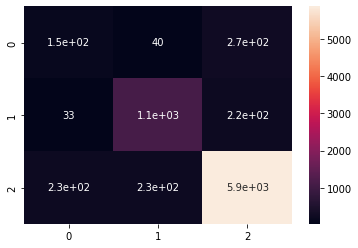

In [11]:
#show heatmap
import pandas as pd
import seaborn as sns
from sklearn import metrics
# sns.heatmap(pd.DataFrame(metrics.confusion_matrix(y_test, prediction)), annot=True, cmap="YlGnBu" ,fmt='g')
sns.heatmap(metrics.confusion_matrix(y_test, prediction), annot=True)

In [12]:
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the DecisionTreeClassifier on Testing Sample Data:', round(F1_Score,2))

Accuracy of the DecisionTreeClassifier on Testing Sample Data: 0.87


In [13]:
Precision_Score=metrics.precision_score(y_test, prediction, average='weighted')
print('Precision score of DecisionTreeClassifier :',round(Precision_Score,2) )

Precision score of DecisionTreeClassifier : 0.87


In [14]:
Recall=metrics.recall_score(y_test, prediction, average='weighted')
print('Recall score of DecisionTreeClassifier :',round(Recall,2) )

Recall score of DecisionTreeClassifier : 0.87


Support vector machine

In [15]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

SVC()

In [16]:
sv_prediction = svc.predict(X_test)
print(sv_prediction)

['Offensive Language' 'Offensive Language' 'Offensive Language' ...
 'Offensive Language' 'Offensive Language' 'Offensive Language']


In [17]:
from sklearn import metrics
print(metrics.classification_report(y_test, sv_prediction))
print(metrics.confusion_matrix(y_test, sv_prediction))

                       precision    recall  f1-score   support

 Hate Speech Detected       0.56      0.06      0.12       465
No Hate and Offensive       0.80      0.89      0.84      1379
   Offensive Language       0.92      0.96      0.94      6335

             accuracy                           0.90      8179
            macro avg       0.76      0.64      0.63      8179
         weighted avg       0.88      0.90      0.88      8179

[[  30   61  374]
 [   2 1234  143]
 [  22  256 6057]]


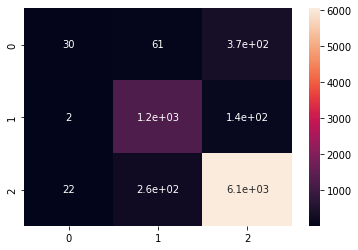

In [18]:
import seaborn as sns
from sklearn import metrics
sns.heatmap(metrics.confusion_matrix(y_test, sv_prediction), annot=True)

In [19]:
# Printing the Overall Accuracy of the svm model
F1_Score=metrics.f1_score(y_test, sv_prediction, average='weighted')
print('Accuracy of SVM the model on Testing Sample Data:', round(F1_Score,2))

Accuracy of SVM the model on Testing Sample Data: 0.88


In [20]:
Precision_Score=metrics.precision_score(y_test, sv_prediction, average='weighted')
print('Precision of SVM:',round(Precision_Score,2) )

Precision of SVM: 0.88


BERT

In [2]:
import numpy as np 
import pandas as pd


In [5]:
# !pip install bert-for-tf2
!pip install pytorch-pretrained-bert
!pip install pytorch-nlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 123 kB 7.3 MB/s 
     |████████████████████████████████| 132 kB 58.9 MB/s 
     |████████████████████████████████| 79 kB 9.7 MB/s 
     |████████████████████████████████| 9.0 MB 47.8 MB/s 
     |████████████████████████████████| 139 kB 73.8 MB/s 
     |████████████████████████████████| 127 kB 72.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |█████████████████████████

In [6]:
import sys
import numpy as np
import random as rn
import pandas as pd
import torch
from pytorch_pretrained_bert import BertModel
from torch import nn
from pytorch_pretrained_bert import BertTokenizer
from keras.preprocessing.sequence import pad_sequences
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from torch.optim import Adam
from torch.nn.utils import clip_grad_norm_
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
data = pd.read_csv("labeled_data.csv")
sub_df = data[['class', 'tweet']]
sub_df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [9]:
train = sub_df[:10000]
test = sub_df[:2000]

In [10]:
train = train.to_dict(orient='records')
test = test.to_dict(orient='records')

In [11]:
train_texts, train_labels = list(zip(*map(lambda d: (d['tweet'], d['class']), train)))
test_texts, test_labels = list(zip(*map(lambda d: (d['tweet'], d['class']), test)))

len(train_texts), len(train_labels), len(test_texts), len(test_labels)

(10000, 10000, 2000, 2000)

In [12]:
sentences = [len(sent) for sent in train_texts]

In [13]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

100%|██████████| 231508/231508 [00:00<00:00, 1272901.29B/s]


In [14]:
train_tokens = list(map(lambda t: ['[CLS]'] + tokenizer.tokenize(t)[:510] + ['[SEP]'], train_texts))
test_tokens = list(map(lambda t: ['[CLS]'] + tokenizer.tokenize(t)[:510] + ['[SEP]'], test_texts))

len(train_tokens), len(test_tokens)

(10000, 2000)

In [15]:
train_tokens_ids = pad_sequences(list(map(tokenizer.convert_tokens_to_ids, train_tokens)), maxlen=512, truncating="post", padding="post", dtype="int")
test_tokens_ids = pad_sequences(list(map(tokenizer.convert_tokens_to_ids, test_tokens)), maxlen=512, truncating="post", padding="post", dtype="int")

train_tokens_ids.shape, test_tokens_ids.shape

((10000, 512), (2000, 512))

In [16]:
train_y = np.array(train_labels)
test_y = np.array(test_labels)
train_y.shape, test_y.shape, np.mean(train_y), np.mean(test_y)

((10000,), (2000,), 1.0954, 1.108)

In [17]:
train_masks = [[float(i > 0) for i in ii] for ii in train_tokens_ids]
test_masks = [[float(i > 0) for i in ii] for ii in test_tokens_ids]

In [18]:
train_tokens_ids

array([[ 101,  999,  999, ...,    0,    0,    0],
       [ 101,  999,  999, ...,    0,    0,    0],
       [ 101,  999,  999, ...,    0,    0,    0],
       ...,
       [ 101, 1045, 7110, ...,    0,    0,    0],
       [ 101, 1045, 7110, ...,    0,    0,    0],
       [ 101, 1045, 7110, ...,    0,    0,    0]])

In [19]:
class BertBinaryClassifier(nn.Module):
    def __init__(self, dropout=0.1):
        super(BertBinaryClassifier, self).__init__()

        self.bert = BertModel.from_pretrained('bert-base-uncased')

        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, tokens, masks=None):
        _, pooled_output = self.bert(tokens, attention_mask=masks, output_all_encoded_layers=False)
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        proba = self.sigmoid(linear_output)
        return proba

In [21]:
bert_clf = BertBinaryClassifier()
bert_clf = bert_clf.cuda()

100%|██████████| 407873900/407873900 [00:11<00:00, 34975741.94B/s]


In [22]:
BATCH_SIZE = 1
EPOCHS = 1

In [23]:
x = torch.tensor(train_tokens_ids[:3]).to(device)
y, pooled = bert_clf.bert(x, output_all_encoded_layers=False)
x.shape, y.shape, pooled.shape

(torch.Size([3, 512]), torch.Size([3, 512, 768]), torch.Size([3, 768]))

In [24]:
train_tokens_tensor = torch.tensor(train_tokens_ids)
train_y_tensor = torch.tensor(train_y.reshape(-1, 1)).float()

test_tokens_tensor = torch.tensor(test_tokens_ids)
test_y_tensor = torch.tensor(test_y.reshape(-1, 1)).float()

train_masks_tensor = torch.tensor(train_masks)
test_masks_tensor = torch.tensor(test_masks)

In [25]:
str(torch.cuda.memory_allocated(device)/1000000 ) + 'M'

'3115.222528M'

In [26]:
train_dataset = TensorDataset(train_tokens_tensor, train_masks_tensor, train_y_tensor)
train_sampler = RandomSampler(train_dataset)
train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=BATCH_SIZE)

test_dataset = TensorDataset(test_tokens_tensor, test_masks_tensor, test_y_tensor)
test_sampler = SequentialSampler(test_dataset)
test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=BATCH_SIZE)

param_optimizer = list(bert_clf.sigmoid.named_parameters()) 
optimizer_grouped_parameters = [{"params": [p for n, p in param_optimizer]}]

In [27]:
optimizer = Adam(bert_clf.parameters(), lr=3e-6)

In [28]:
for epoch_num in range(EPOCHS):
    bert_clf.train()
    train_loss = 0
    for step_num, batch_data in enumerate(train_dataloader):
        token_ids, masks, labels = tuple(t.to(device) for t in batch_data)
        print(str(torch.cuda.memory_allocated(device)/1000000 ) + 'M')
        logits = bert_clf(token_ids, masks)
        
        loss_func = nn.BCELoss()

        batch_loss = loss_func(logits, labels)
        train_loss += batch_loss.item()
        
        
        bert_clf.zero_grad()
        batch_loss.backward()
        

        clip_grad_norm_(parameters=bert_clf.parameters(), max_norm=1.0)
        optimizer.step()
        
        clear_output(wait=True)
        print('Epoch: ', epoch_num + 1)
        print("\r" + "{0}/{1} loss: {2} ".format(step_num, len(train) / BATCH_SIZE, train_loss / (step_num + 1)))

Epoch:  1
9999/10000.0 loss: -3.6421549278954117 


In [29]:
bert_clf.eval()
bert_predicted = []
all_logits = []
with torch.no_grad():
    for step_num, batch_data in enumerate(test_dataloader):

        token_ids, masks, labels = tuple(t.to(device) for t in batch_data)

        logits = bert_clf(token_ids, masks)
        loss_func = nn.BCELoss()
        loss = loss_func(logits, labels)
        numpy_logits = logits.cpu().detach().numpy()
        
        bert_predicted += list(numpy_logits[:, 0] > 0.5)
        all_logits += list(numpy_logits[:, 0])

In [30]:
from sklearn.metrics import classification_report
print(classification_report(test_y, bert_predicted))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       0.80      1.00      0.89      1604
           2       0.00      0.00      0.00       306

    accuracy                           0.80      2000
   macro avg       0.27      0.33      0.30      2000
weighted avg       0.64      0.80      0.71      2000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
